In [203]:
# Import our libraries 

# Pandas and numpy for data wrangling
import pandas as pd

# Seaborn / matplotlib for visualization 
import seaborn as sns
import sklearn

# Import the trees from sklearn
from sklearn import tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.tree import DecisionTreeClassifier

# Helper function to split our data


# Helper fuctions to evaluate our model.


# Helper function for hyper-parameter turning.


# Import our Decision Tree


# Import our Random Forest 

# Use inline so our visualizations display in notebook
%matplotlib inline

## Main Steps when building a Machine Learning Model. 
1. Inspect and explore data.
2. Select and engineer features.
3. Build and train model.
4. Evaluate model.

# #1 Inspect and explore data.
* Load titanic data
* Visualize all the data using sns.pairplot
* Check for null values

In [204]:
df = pd.read_csv('data/titanic.csv')

display(df)

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# #2 Select and engineer features.
1. Fill age null values with -999
1. Convert to numerical values if need be by using `pd.get_dummies()`
1. Create a list of the features you are going to use.  In this case use as many or as little as you would like.
1. Define our `X` and `y`
1. Split our data into trainig and testing sets.

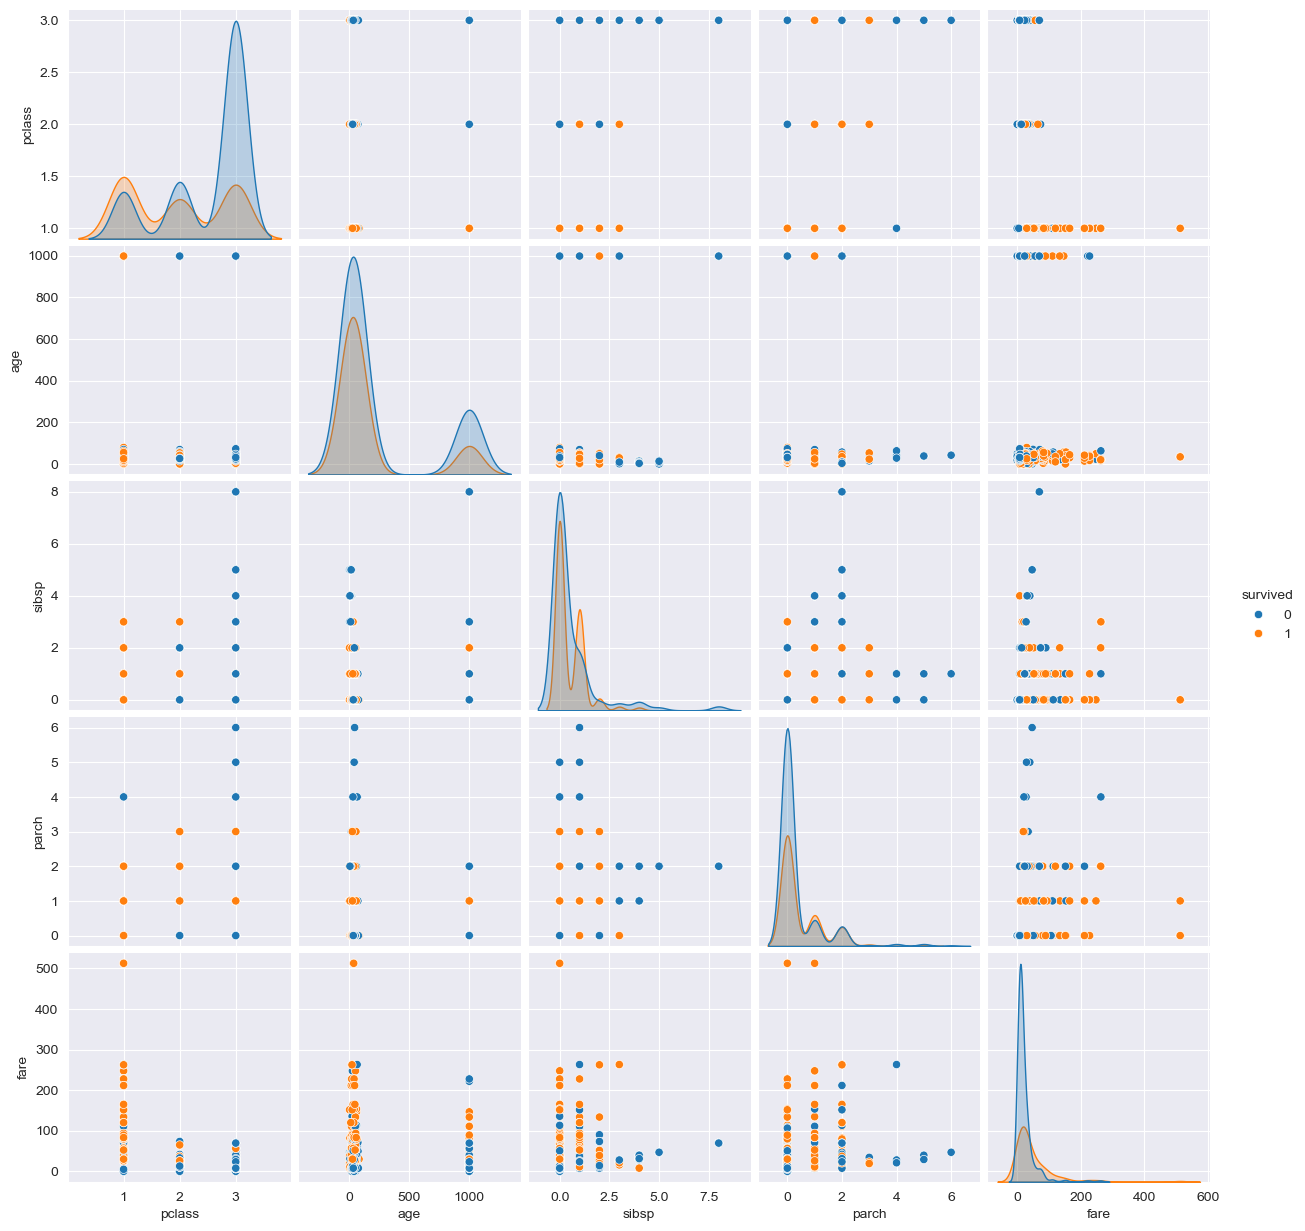

In [205]:
# Fill age null values with -999

df['deck'] = df['cabin'].str[0].fillna('no_cabin')
selected_features = ['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'deck']

df = df[selected_features]
df['age'] = df['age'].fillna(999)

sns.pairplot(df, hue='survived')

In [206]:
# 1. Convert to numerical values if need be by using `pd.get_dummies()`

# dropping dummies is not necessary in tree-based models, but it makes our df more concise
dummy = pd.get_dummies(df[['deck', 'sex']], prefix= ['deck', 'sex'], drop_first=True)
pd.concat([df, dummy], axis=1)
df = df.drop(['deck', 'sex'], axis=1)

In [207]:
# Define our `X` and `y`

y = df['survived']
X = df.drop(['survived'], axis=1)

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.2, random_state=0)

print('Length of our Training data:', {len(X_train)}, '\nLength of our Testing data:', {len(X_test)})

Length of our Training data: {712} 
Length of our Testing data: {179}


# #3 Build and train model.
1. For our first pass, initialize our model with `max_depth=2`.
2. Fit our model with our training data. 
3. Make predictions of our testing data. 
4. Evaluate and print our model scores using accuracy, precision, recall, f1 scores, and auc scores. 
    * To calculate auc score you have to get the predicted probabilites for the Survived class using `model.predict_proba(X_test)[:,1]`
5. Visualize our Decision Tree using provided code. 


In [208]:
# For our first pass, initialize our model with `max_depth=2`.

model = DecisionTreeClassifier(max_depth=2, random_state=0)

In [209]:
# Fit our model with our training data. 

model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=0)

In [210]:
# Make predictions of our testing data. 

y_pred = model.predict(X_test)

In [211]:
# 4. Evaluate and print our model scores using accuracy, precision, recall, f1 scores, and auc scores. 
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score: %f" % accuracy)

precision = precision_score(y_test, y_pred)
print("Precision Score: %f" % precision)

recall = recall_score(y_test, y_pred)
print("Recall Score: %f" % recall)

f1 = f1_score(y_test, y_pred)
print('F1 Score: %f' % f1)

# Calculate predicted probabilities
y_pred_proba = model.predict_proba(X_test)[:, 1]
display(y_pred_proba)

# Compute auc score
auc = roc_auc_score(y_test, y_pred_proba)
print('AUC Score: %f' % auc)

Accuracy Score: 0.737430
Precision Score: 0.661765
Recall Score: 0.652174
F1 Score: 0.656934


array([0.2303523 , 0.2303523 , 0.2303523 , 0.62240664, 0.2303523 ,
       0.62240664, 0.62240664, 0.62240664, 0.62240664, 0.2303523 ,
       0.2303523 , 0.30666667, 0.2303523 , 0.62240664, 0.62240664,
       0.2303523 , 0.2303523 , 0.62240664, 0.2303523 , 0.55555556,
       0.30666667, 0.62240664, 0.2303523 , 0.62240664, 0.2303523 ,
       0.62240664, 0.2303523 , 0.2303523 , 0.62240664, 0.55555556,
       0.2303523 , 0.30666667, 0.2303523 , 0.62240664, 0.2303523 ,
       0.62240664, 0.2303523 , 0.30666667, 0.30666667, 0.62240664,
       0.62240664, 0.2303523 , 0.2303523 , 0.2303523 , 0.62240664,
       0.2303523 , 0.2303523 , 0.62240664, 0.30666667, 0.62240664,
       0.62240664, 0.62240664, 0.62240664, 0.2303523 , 0.62240664,
       0.62240664, 0.62240664, 0.2303523 , 0.2303523 , 0.2303523 ,
       0.2303523 , 0.2303523 , 0.62240664, 0.62240664, 0.2303523 ,
       0.2303523 , 0.62240664, 0.62240664, 0.62240664, 0.62240664,
       0.62240664, 0.62240664, 0.62240664, 0.2303523 , 0.23035

AUC Score: 0.742622


In [212]:
# 4. Evaluate and print our model scores using accuracy, precision, recall, f1 scores, and auc scores. 
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score: %f" % accuracy)

precision = precision_score(y_test, y_pred)
print("Precision Score: %f" % precision)

recall = recall_score(y_test, y_pred)
print("Recall Score: %f" % recall)

f1 = f1_score(y_test, y_pred)
print('F1 Score: %f' % f1)

# Compute auc score
auc = roc_auc_score(y_test, y_pred_proba)
print('AUC Score: %f' % auc)

# Calculate predicted probabilities
y_pred_proba = model.predict_proba(X_test)[:, 1]
proba_df = pd.DataFrame(y_pred_proba, columns=['P(Survived)'])
display(proba_df)

Accuracy Score: 0.737430
Precision Score: 0.661765
Recall Score: 0.652174
F1 Score: 0.656934
AUC Score: 0.742622


,P(Survived)
0,0.230352
1,0.230352
2,0.230352
3,0.622407
4,0.230352
...,...
174,0.230352
175,0.230352
176,0.622407
177,0.230352


# Visualize your tree

# Picking the right parameters...

# Parameter tuning of your Decision Tree using GridSearch or RandomizedSearch

### For assistance on this, look at Steves TA Tips code in `TA-Tips/random_forest_tuning.ipynb`


1. Make a dictionary of at least 3 parameters and a list of 3 values for each for your grid search. 
1. Initalize your GridSearchCV with a DecisionTreeClassifier, your param_grid, and what you are optimizing for.  Choose any of the five optimization strategies; accuracy, precision, recall, f1, or roc_auc.
1. Fit your GridSearchCV with your training data. 
1. Print the parameters of your best model. 
1. Evaluate your best model using accuracy, precision, recall, f1 scores, and auc scores. 
1. Visualize your best tree.
1. Which feature was your most important feature?

```python
tree.DecisionTreeClassifier(
    *,
    criterion='gini',
    splitter='best',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    class_weight=None,
    presort='deprecated',
    ccp_alpha=0.0,
)
```


[Tips on how to customize / set the paramters in the decision tree.](https://scikit-learn.org/stable/modules/tree.html#tips-on-practical-use)

In [213]:
# 1. Make a dictionary of at least 3 parameters and a list of 3 values for each for your grid search.from sklearn.model_selection import GridSearchCV
params = { 
    'PARAMETER_NAME': ['LIST', 'OF', 'VALUES'], ??? }

SyntaxError: invalid syntax (27293303.py, line 3)

In [ ]:
# 1. Initalize your GridSearchCV with a DecisionTreeClassifier, your param_grid, and what you are optimizing for.  Choose any of the five optimization strategies; accuracy, precision, recall, f1, or roc_auc.
grid_search_cv =  GridSearchCV( ??? )

In [ ]:
# 1. Fit your GridSearchCV with your training data. 


In [ ]:
# 1. Print the parameters of your best model. 
# Print the best parameters it found
print( ??? )

In [ ]:
# 1. Evaluate your best model using accuracy, precision, recall, f1 scores, and auc scores. 

# This command gives you the best tree
model = ???

# Now lets evaluate our model
y_pred = ???

accuracy = ???
print("Accuracy Score: %f" % accuracy)

precision = ???
print("Precision Score: %f" % precision)

recall = ???
print("Recall Score: %f" % recall)

f1 = ???
print('F1 Score: %f' % f1)

# Calculate predicted probabilities, keep only probability for when class = 1
y_pred_proba = model.predict_proba(???)[:,1]
auc = ???
print('AUC Score: %f' % auc)

In [ ]:
# 1. Which feature was your most important feature?
# Now lets look at our feature importances
feature_imp = pd.DataFrame.from_dict( {'feature_importance': model.feature_importances_,
                                       'feature':selected_features }).sort_values('feature_importance', ascending=False)
feature_imp

# Now onto Random Forests...
Were going to do the same with, but this time with a random forest. Remeber... Repetition is the father of learning.

1. Make a dictionary of at least 3 parameters and a list of 3 values for each for your grid search. 
1. Initalize your GridSearchCV with a RandomForestClassifer, your param_grid, and what you are optimizing for.  Choose any of the five optimization strategies; accuracy, precision, recall, f1, or roc_auc.
1. Fit your GridSearchCV with your training data. 
1. Print the parameters of your best model. 
1. Evaluate your best model using accuracy, precision, recall, f1 scores, and auc scores. 
1. Which feature was your most important feature?


# Parameters of the Random Forest Classifier

```python
RandomForestClassifier(
    n_estimators=100,
    *,
    criterion='gini',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='auto',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    bootstrap=True,
    oob_score=False,
    n_jobs=None,
    random_state=None,
    verbose=0,
    warm_start=False,
    class_weight=None,
    ccp_alpha=0.0,
    max_samples=None,
)
```

In [ ]:
# 1. Make a dictionary of at least 3 parameters and a list of 3 values for each for your grid search. 
params = {
    'PARAMETER_1_NAME': ['LIST', 'OF', 'VALUES'], 
    'PARAMETER_2_NAME': ['LIST', 'OF', 'VALUES'],
    'PARAMETER_3_NAME': ['LIST', 'OF', 'VALUES'],
}

In [ ]:
# 1. Initalize your GridSearchCV or RandomizedSearchCV with a RandomForestClassifer, your param_grid, and what you are optimizing for.  Choose any of the five optimization strategies; accuracy, precision, recall, f1, or roc_auc.



In [ ]:
# 1. Fit your GridSearchCV with your training data. 


In [ ]:
# 1. Print the parameters of your best model. 
# Print the best parameters it found
print(???)




In [ ]:
# 1. Evaluate your best model using accuracy, precision, recall, f1 scores, and auc scores. 

# This command gives you tree that has the highest f1-score. 
model = grid_search_cv.best_estimator_


# Now lets evaluate our model
y_pred = ???

accuracy = ???
print("Accuracy Score: %f" % accuracy)

precision = ???
print("Precision Score: %f" % precision)

recall = ???
print("Recall Score: %f" % recall)

f1 = ???
print('F1 Score: %f' % f1)

# Calculate predicted probabilities, keep only probability for when class = 1
y_pred_proba = model.predict_proba(X_test)[:,1]

auc = ???
print('AUC Score: %f' % auc)

In [ ]:
# 1. Which feature was your most important feature?
# Now lets look at our feature importances
feature_imp = pd.Series(model.feature_importances_,index=selected_features).sort_values(ascending=False)
feature_imp

# Build a random forest using the ny-vs-sf-housing.csv data. 
* Your target variable, aka the column you are trying to predict, aka your `y` variable is `in_sf`. 
* Can you get an accuracy above %88.8889?
* What was your most important feature?


In [ ]:
df = pd.read_csv('data/ny-vs-sf-houses.csv')
df.head()

In [ ]:
# BUILD, TRAIN, AND EVAULATE A RANDOM FOREST MODEL BELOW. 



# Awesome difficult extra credit below:
Build a classifier using the adult_income.csv data.  
* The target variable is 'class'
* Start with just using these features `selected_features = ['age', 'fnlwgt', 'capital_gain', 'capital_loss', 'hours_per_week']`
* You have to include the pos_label in your precision, recall, and f1 scores. It just tells the classifier which one is the posotive label.  I provided the proper way below.

* See if you can get above 50% f1 score.  
* See some [super tricks and tips here](https://www.kaggle.com/code/jieyima/income-classification-model)

In [ ]:
df = pd.read_csv('data/adult_income.csv')
df.head()